<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork1047-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# Multiple Linear Regression


Estimated time needed: **15** minutes
    

## Objectives

After completing this lab you will be able to:

* Use scikit-learn to implement Multiple Linear Regression
* Create a model, train it, test it and use the model


<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#understanding-data">Understanding the Data</a></li>
        <li><a href="#reading_data">Reading the Data in</a></li>
        <li><a href="#multiple_regression_model">Multiple Regression Model</a></li>
        <li><a href="#prediction">Prediction</a></li>
        <li><a href="#practice">Practice</a></li>
    </ol>
</div>
<br>
<hr>


### Importing Needed packages


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


<h2 id="understanding_data">Understanding the Data</h2>

### `FuelConsumption.csv`:
We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork1047-2023-01-01)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUELTYPE** e.g. z
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


<h2 id="reading_data">Reading the data in</h2>


In [2]:
df = pd.read_csv("FuelConsumptionCO2.csv")

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
df.columns.to_list()

['MODELYEAR',
 'MAKE',
 'MODEL',
 'VEHICLECLASS',
 'ENGINESIZE',
 'CYLINDERS',
 'TRANSMISSION',
 'FUELTYPE',
 'FUELCONSUMPTION_CITY',
 'FUELCONSUMPTION_HWY',
 'FUELCONSUMPTION_COMB',
 'FUELCONSUMPTION_COMB_MPG',
 'CO2EMISSIONS']

Let's select some features that we want to use for regression.


In [4]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


Let's plot Emission values with respect to Engine size:


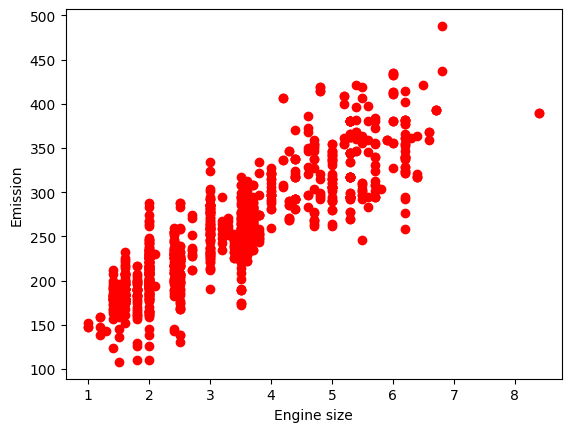

In [5]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='red')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### Creating train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. 
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the model. Therefore, it gives us a better understanding of how well our model generalizes on new data.

We know the outcome of each data point in the testing dataset, making it great to test with! Since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Let's split our dataset into train and test sets. 

In [6]:
from sklearn.model_selection import train_test_split
# define the data
y_data = cdf['CO2EMISSIONS']
x_data = cdf.drop('CO2EMISSIONS', axis = 1)

# split data into train and test set
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.20, random_state=1)

# print the size of the test and train samples
print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 214
number of training samples: 853


#### Train data distribution


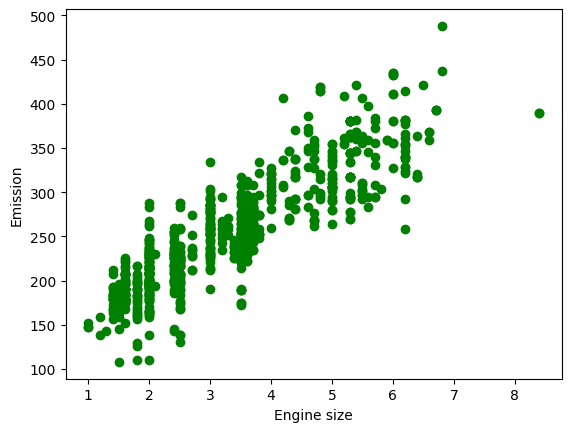

In [17]:
plt.scatter(x_train.ENGINESIZE, y_train,  color='green')

plt.xlabel("Engine size")
plt.ylabel("Emission")

plt.show()

<h2 id="multiple_regression_model">Multiple Regression Model</h2>


In reality, there are multiple variables that impact the co2emission. When more than one independent variable is present, the process is called multiple linear regression. An example of multiple linear regression is predicting co2emission using the features FUELCONSUMPTION_COMB, EngineSize and Cylinders of cars. The good thing here is that multiple linear regression model is the extension of the simple linear regression model.


In [61]:
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [62]:
#define the train data
x = x_train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']]
y = y_train.to_frame()

# create linear regression object
lr = LinearRegression()

# fit the model
lr.fit(x,y)

# The coefficients
print('Coefficients:', lr.coef_)
print('Intercept:', lr.intercept_)

Coefficients: [[11.56295409  6.91231122  9.72527271]]
Intercept: [65.17950048]


Model:

**CO2EMISSIONS** = 65.18 + (11.56 x **ENGINESIZE**) + (6.91 x **CYLINDERS**) + (9.73 x **FUELCONSUMPTION_COMB**)

As mentioned before, __Coefficient__ and __Intercept__  are the parameters of the fitted line. 
Given that it is a multiple linear regression model with 3 parameters and that the parameters are the intercept and coefficients of the hyperplane, sklearn can estimate them from our data. Scikit-learn uses plain Ordinary Least Squares method to solve this problem.

One way to look at the fit of the model is by looking at the distribution plot. We can look at the **distribution** of the fitted values that result from the model and compare it to the **distribution** of the actual values.

In [67]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    sns.kdeplot(RedFunction, fill=True, color='r', label=RedName)
    sns.kdeplot(BlueFunction, fill=False, color='b' ,label=BlueName)

    plt.title(Title)
    plt.xlabel('Emission of CO2')
    plt.ylabel('Density')
    plt.legend()

    plt.show()
    plt.close()

In [68]:
# predict value
yhat = lr.predict(x)

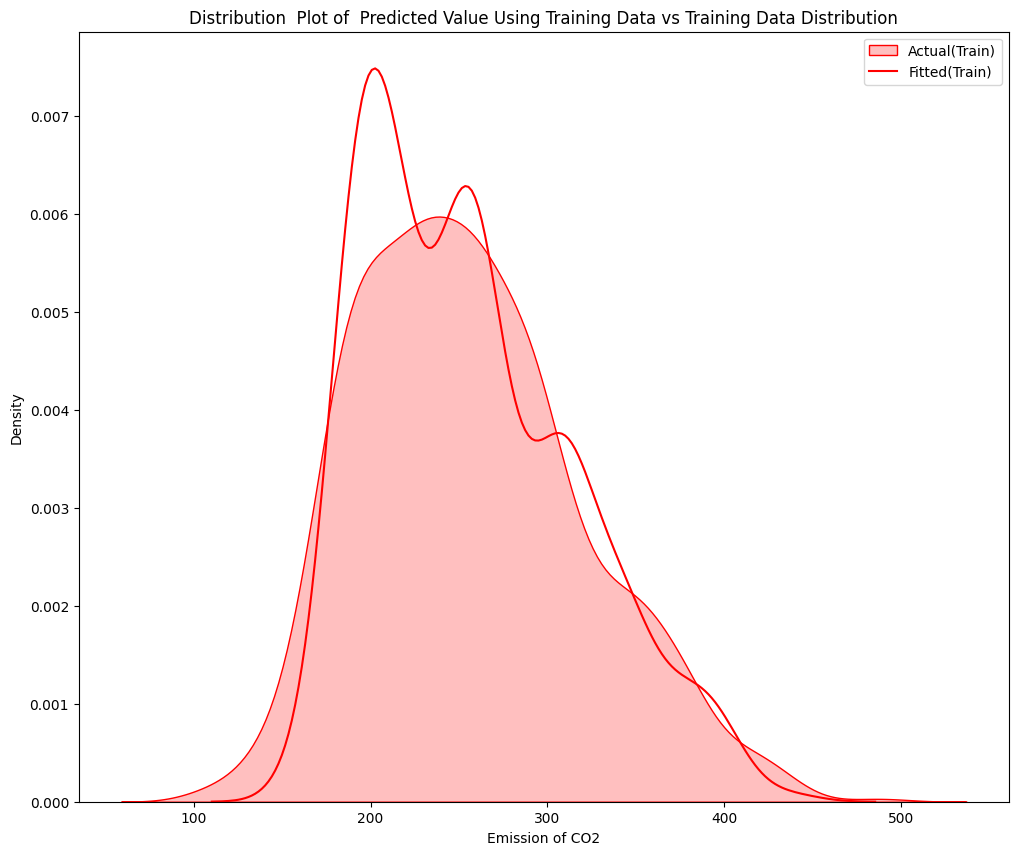

In [69]:
DistributionPlot(y, yhat,'Actual(Train)', 'Fitted(Train)', 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution')

**Figure 1**: Plot of predicted values using the training data compared to the actual values of the training data.

In [70]:
#define the test data
X = x_test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']]
Y = y_test.to_frame()

# predict value
Yhat = lr.predict(X)

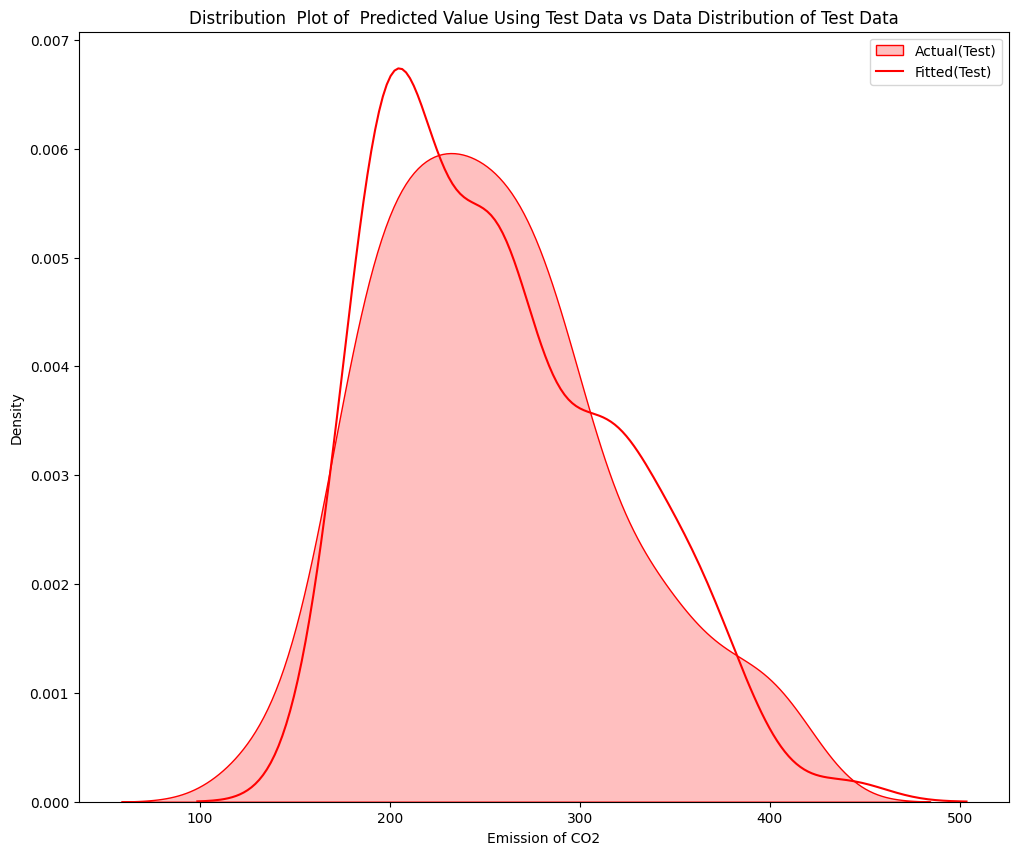

In [71]:
DistributionPlot(Y, Yhat,'Actual(Test)', 'Fitted(Test)', 'Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data')

**Figure 2**: Plot of predicted value using the test data compared to the actual values of the test data

In [78]:
# R2 of the test data
print('R squared value:',lr.score(X,Y))

R squared value: 0.8653355812644817


**ANOTHER WAY OF CALCULATIG R2 SCORE**

In [81]:
from sklearn.metrics import r2_score

In [82]:
# Calculate the R2 score
r2 = r2_score(Y, Yhat)

print("R2 Score:", r2)

R2 Score: 0.8653355812644817


In [72]:
from sklearn.metrics import explained_variance_score

In [76]:
# Calculate the explained variance score
ev_score = explained_variance_score(Y, Yhat)

print("Explained Variance Score:", ev_score)

Explained Variance Score: 0.8659879546027105



#### Ordinary Least Squares (OLS)
**OLS** is a method for estimating the unknown parameters in a linear regression model. **OLS** chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the target dependent variable and those predicted by the linear function. In other words, it tries to minimizes the **sum of squared errors (SSE)** or **mean squared error (MSE)** between the target variable (y) and our predicted output ($\hat{y}$) over all samples in the dataset.

OLS is a method used to find the best-fitting straight line through a set of data points. It does this by minimizing the overall distance between the observed data points and the line. The line represents a mathematical equation that predicts the value of a dependent variable based on the values of independent variables.

The idea behind OLS is to find the line that minimizes the sum of the squared differences between the observed values and the predicted values. By doing so, it finds the coefficients of the line that provide the best fit to the data.

Once the coefficients are estimated, the line can be used to make predictions for new data points. OLS also provides statistics that help assess the significance of the relationship between the variables and the reliability of the coefficients.

In simple terms, OLS is a method that finds the line that best represents the relationship between variables by minimizing the distance between the data points and the line. It's used to make predictions and understand the statistical significance of the relationship

OLS can find the best parameters using of the following methods:
* Solving the model parameters analytically using closed-form equations
* Using an optimization algorithm (Gradient Descent, Stochastic Gradient Descent, Newton’s Method, etc.)


__Explained variance regression score:__  
Let $\hat{y}$ be the estimated target output, y the corresponding (correct) target output, and Var be the Variance (the square of the standard deviation). Then the explained variance is estimated as follows:

$\texttt{explainedVariance}(y, \hat{y}) = 1 - \frac{Var\{ y - \hat{y}\}}{Var\{y\}}$  
The best possible score is 1.0, the lower values are worse.

- Calculate the Sum of Squared Errors (SSE):

For each data point, subtract the `predicted value` (based on the regression model) from the corresponding `observed value` of the dependent variable.
Square each of these differences.
Sum up all the squared differences.

**SSE = Σ(yᵢ - ŷᵢ)²**

Where:

yᵢ represents the observed value of the dependent variable for each data point.
ŷᵢ represents the predicted value of the dependent variable based on the regression model for each data point.
Σ represents the sum over all data points.

- Calculate the Total Sum of Squares (SST):

For each data point, subtract the mean of the `dependent variable` from the `observed value`.
Square each of these differences.
Sum up all the squared differences.

**SST = Σ(yᵢ - ȳ)²**

Where:

yᵢ represents the observed value of the dependent variable for each data point.
ȳ represents the mean of the dependent variable.
Σ represents the sum over all data points.

- Calculate the Explained Variance (EV):

Divide the SSE by the SST.
Subtract the result from 1.

 **EV = 1 - (SSE / SST)**

The resulting value of EV will be between 0 and 1. A value closer to 1 indicates that the regression model explains a larger proportion of the variance in the dependent variable. Conversely, a value closer to 0 suggests that the model explains less of the variance, indicating a poorer fit.

By using the formula for explained variance, you can assess the proportion of the total variance in the dependent variable that is accounted for by the regression model.

**R-squared and explained variance are interchangeable terms that represent the same concept and are calculated using the same formula.**

<h2 id="practice">Practice</h2>
Try to use a multiple linear regression with the same dataset, but this time use FUELCONSUMPTION_CITY and FUELCONSUMPTION_HWY instead of FUELCONSUMPTION_COMB. Does it result in better accuracy?


In [83]:
# define the train data
x = x_train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']]
y =y_train.to_frame()

# Create an instance of the LinearRegression model
model = LinearRegression()

# Fit the model to training data
model.fit(x, y)

# define the test data
X = x_test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']]
Y =y_test.to_frame()

# Calculate the R2 score
r2 = model.score(X,Y)

print("R2 Score:", r2)

R2 Score: 0.8639143480571767


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="https://www.ibm.com/analytics/spss-statistics-software?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork1047-2023-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://www.ibm.com/cloud/watson-studio?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork1047-2023-01-01">Watson Studio</a>





## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
